In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab

In [5]:
spark_color = "darkorange"
linear_color = "grey"

# https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'}
plt.rcParams.update(params)

def linear_scaleout(scaleout_for_one_node):
    x = [1, 8]
    y = [scaleout_for_one_node, 8 * scaleout_for_one_node]
    return x, y

jobs = [
    ("WikiDataImport", "Wikidata Import"),
    ("TagEntities", "Tag Entities"),
    ("WikipediaImport", "Wikipedia Import"),
    ("TextParser", "Text Parser"),
    ("LinkCleaner", "Link Cleaner"),
    ("RedirectResolver", "Redirect Resolver"),
    ("LinkAnalysis1", "Link Analysis 1"),
    ("CompanyLinkFilter", "Company Link Filter"),
    #("LocalTrieBuilder", "Local Trie Builder"),
    ("AliasTrieSearch", "Alias Trie Search"),
    ("ReducedLinkAnalysis1", "Reduced Link Analysis 1"),
    ("LinkExtender", "Link Extender"),
    ("LinkAnalysis2", "Link Analysis 2"),
    ("ReducedLinkAnalysis2", "Reduced Link Analysis 2"),
    ("AliasCounter", "Alias Counter"),
    ("TermFrequencyCounter", "Term Frequency Counter"),  
    ("DocumentFrequencyCounter", "Document Frequency Counter"),
    ("CosineContextComparator", "Cosine Context Comparator")
       ]
len(jobs)

17

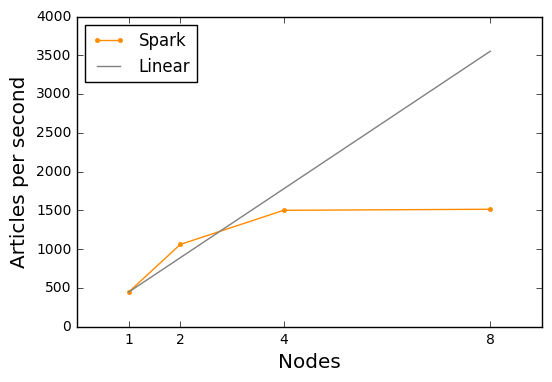

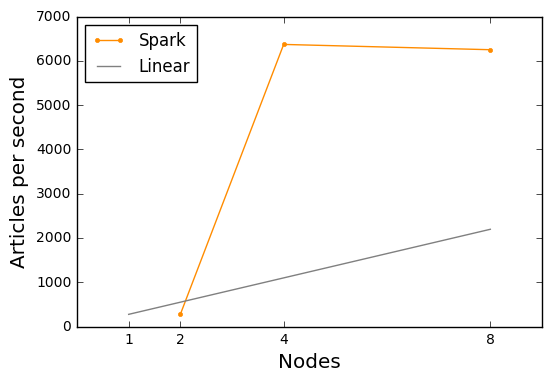

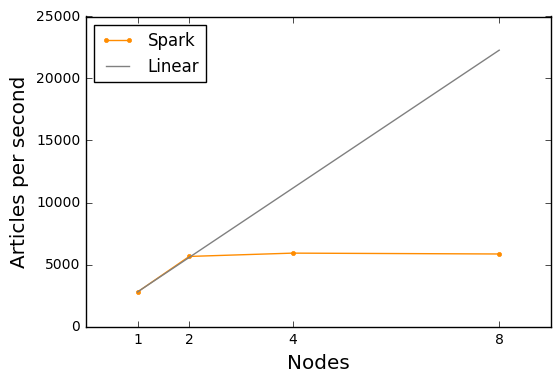

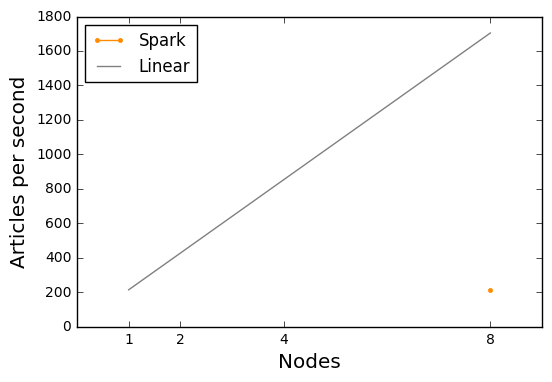

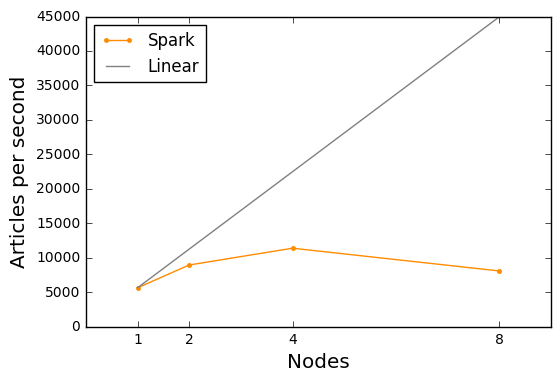

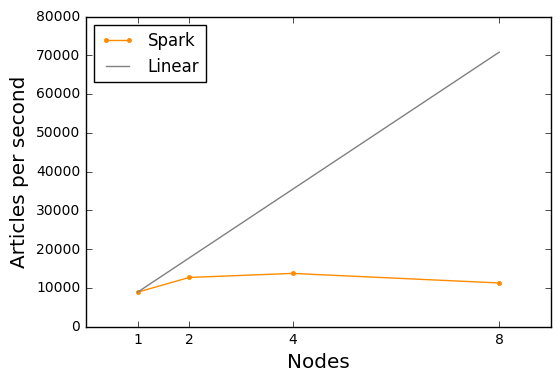

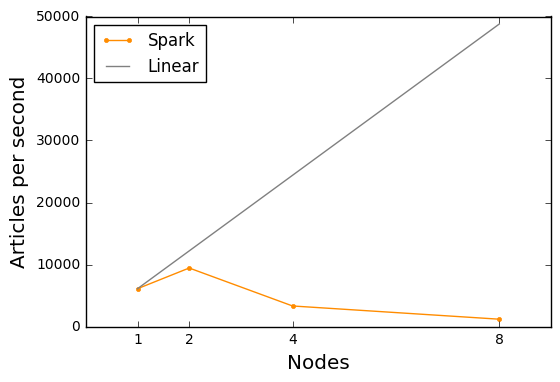

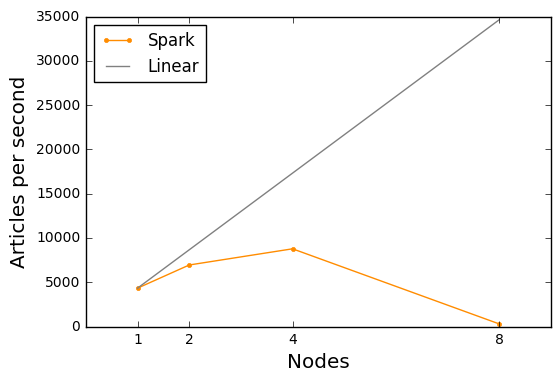

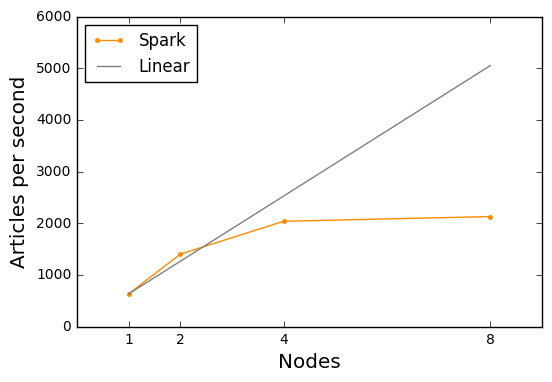

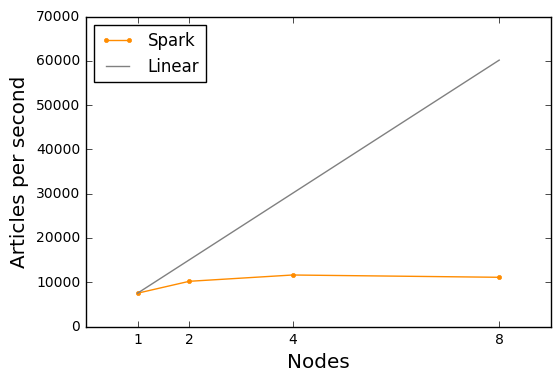

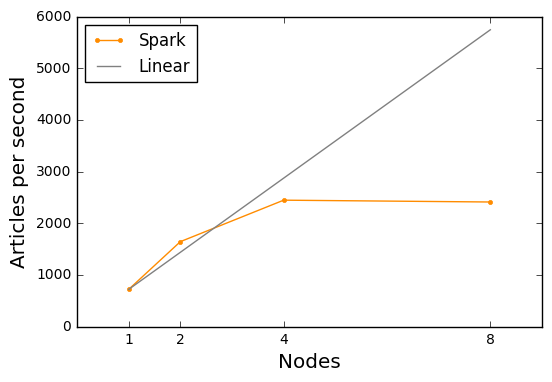

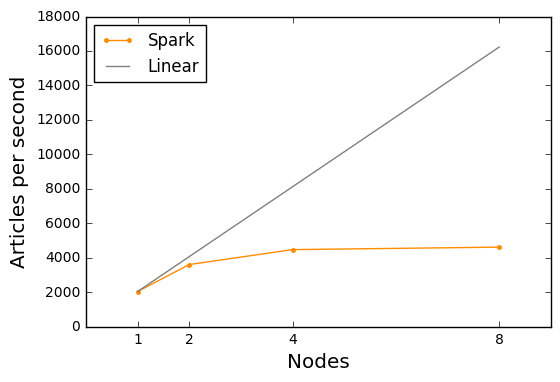

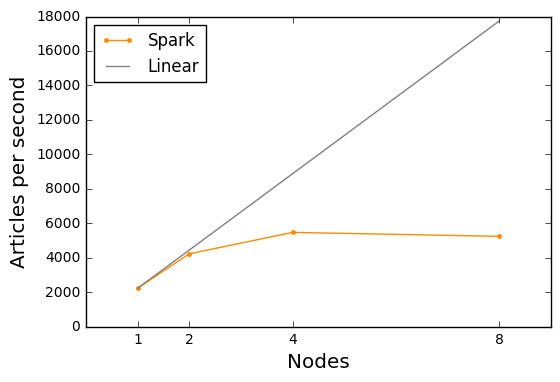

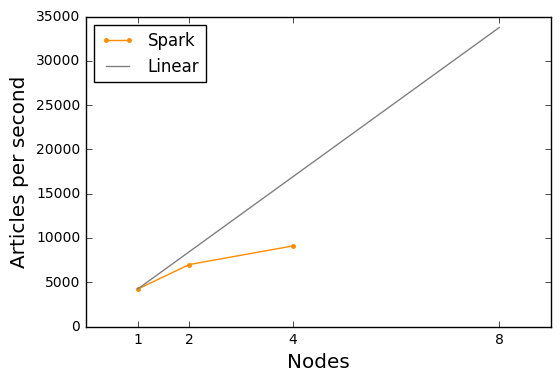

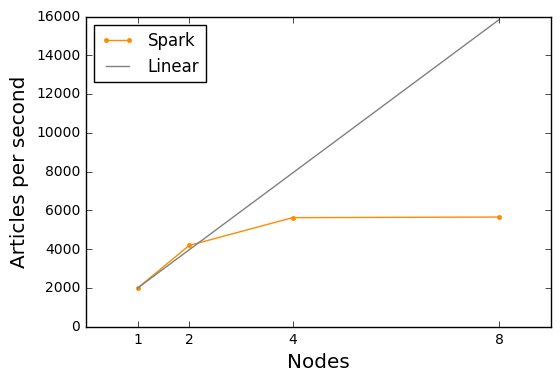

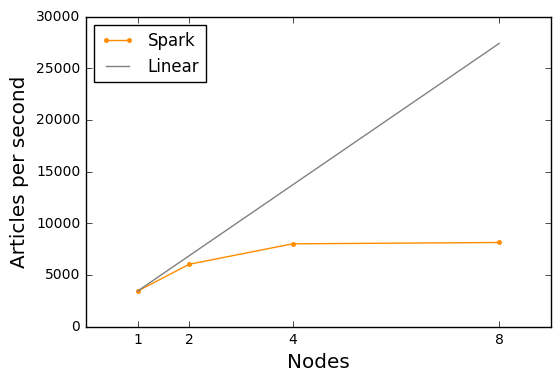

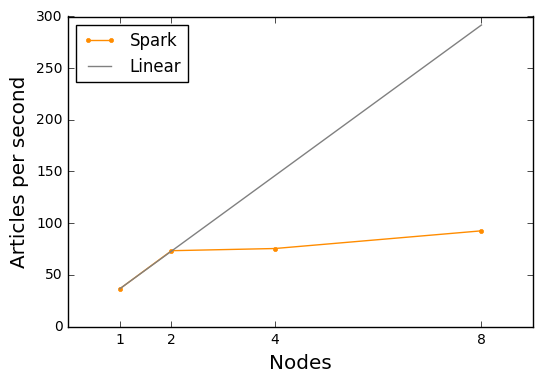

'done'

In [6]:
for job, job_long in jobs:
    df = pd.read_csv("logs/scaleout_" + job + ".csv", sep=",")
    df = df[['nodes', 'passed time (seconds)']]
    df.columns = ['nodes', 'time']
    
    articles = 1e6
    df["scale out"] = articles / df["time"]
    
    x = df[["nodes"]].as_matrix()
    y = df[["scale out"]].as_matrix()
    xlin, ylin = linear_scaleout(y[-1])

    fig, ax = plt.subplots()
    plt.plot(x, y, label="Spark", color=spark_color, marker=".")
    plt.plot(xlin, ylin, label="Linear", color=linear_color)

    ticks = [1, 2, 4, 8]
    ax.set_xticks(ticks)
    ax.set_xlim([0, 9])
    ax.set_ylim(0)

    #plt.title(job_long)
    plt.xlabel("Nodes")
    plt.ylabel("Articles per second")
    plt.legend(loc="best")
    plt.show()
    fig.savefig("plots/" + job + ".pdf", bbox_inches="tight")
    
"done"